In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("Datasets/Housing.csv")

In [3]:
#Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
#Convert all categorical variables to numeric using appropriate encoding
label_enc_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [5]:
# Define independent variables (X) and dependent variable (y)
X = df.drop('price', axis=1)
y = df['price']


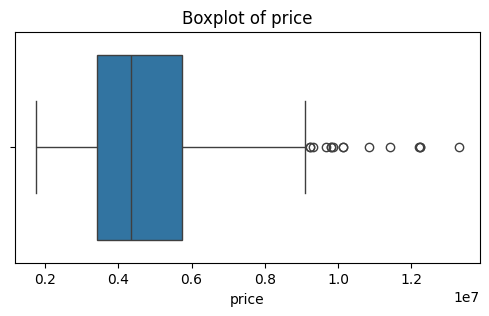

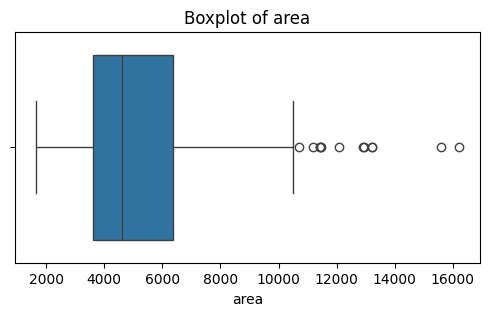

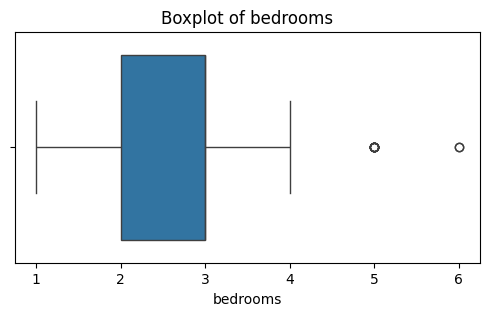

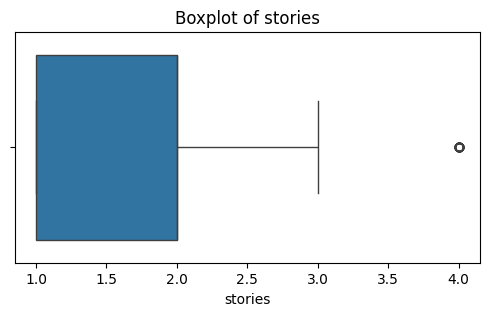

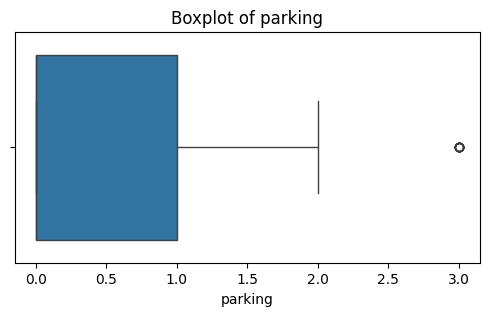

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Plot boxplots for each numerical feature
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [7]:
# Step 2: Function to cap outliers using IQR method
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
        
    return df_capped

# Step 3: Apply the function
df_capped = cap_outliers_iqr(df, num_cols)

# Step 4: Check shape and summary
print("Original shape:", df.shape)
print("Capped shape (should be same):", df_capped.shape)
print(df_capped[num_cols].describe())

Original shape: (545, 14)
Capped shape (should be same): (545, 14)
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.727388e+06   5102.249541    2.950459    1.285321    1.767890   
std    1.745227e+06   2005.804353    0.697504    0.497942    0.777543   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    9.205000e+06  10500.000000    4.500000    3.500000    3.500000   

          parking  
count  545.000000  
mean     0.682569  
std      0.834773  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      2.500000  


In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (use df, df_capped, or df_scaled as per your current workflow)
# For example:
# df = pd.read_csv("Housing.csv")

# Drop target variable (optional) if you want to focus only on feature correlations
# features_df = df.drop(columns=['price'])

# Compute correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [8]:
# Define independent variables (X) and dependent variable (y)
X1 = df_capped.drop('price', axis=1)
y1 = df_capped['price']

In [9]:
# Initialize scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the feature matrix
X_scaled = scaler.fit_transform(X1)

# Convert back to DataFrame (optional but helpful for interpretation)
X_scaled_df = pd.DataFrame(X_scaled, columns=X1.columns)

# Display the first few rows
print(X_scaled_df.head())

       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.156583  1.506093   1.436585  1.586075  0.405623  -0.465315 -0.734539   
1  1.925060  1.506093   4.451753  2.229717  0.405623  -0.465315 -0.734539   
2  2.424072  0.071092   1.436585  0.298791  0.405623  -0.465315  1.361397   
3  1.196504  1.506093   1.436585  0.298791  0.405623  -0.465315  1.361397   
4  1.156583  1.506093  -0.573527  0.298791  0.405623   2.149083  1.361397   

   hotwaterheating  airconditioning   parking  prefarea  \
0        -0.219265         1.472618  1.579640  1.804941   
1        -0.219265         1.472618  2.179156 -0.554035   
2        -0.219265        -0.679063  1.579640  1.804941   
3        -0.219265         1.472618  2.179156  1.804941   
4        -0.219265         1.472618  1.579640 -0.554035   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                        -0.844888                     -0.696429  
1                        -0.844888              

In [10]:
# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Split into training and testing sets (80/20)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [56]:
# Split into training and testing sets (80/20)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled_df, y1, test_size=0.2, random_state=42)

In [57]:
# Train a Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Train a Multiple Linear Regression model
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [59]:
# Train a Multiple Linear Regression model
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [60]:
# Display learned coefficients and intercept
print("\nModel Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.2f}")
print(f"\nIntercept: {model.intercept_:.2f}")


Model Coefficients:
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
mainroad: 367919.95
guestroom: 231610.04
basement: 390251.18
hotwaterheating: 684649.89
airconditioning: 791426.74
parking: 224841.91
prefarea: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06

Intercept: 260032.36


In [61]:
# Predict on the test set
y_pred = model.predict(X_test)

In [62]:
# Predict on the test set
y_pred1 = model1.predict(X_test1)

In [63]:
# Predict on the test set
y_pred2 = model2.predict(X_test2)

In [64]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² Score: 0.653
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66


In [65]:
# Evaluate the model
r2 = r2_score(y_test1, y_pred1)
mae = mean_absolute_error(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)

print(f"\nR² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² Score: 0.682
Mean Absolute Error (MAE): 880919.51
Mean Squared Error (MSE): 1286637069521.38


In [66]:
# Evaluate the model
r2 = r2_score(y_test2, y_pred2)
mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)

print(f"\nR² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R² Score: 0.634
Mean Absolute Error (MAE): 687882.32
Mean Squared Error (MSE): 927328757508.07
